In [23]:
import numpy as np
import pandas as pd
import ast 

credits = pd.read_csv("Dataset/tmdb_5000_credits.csv")
movies = pd.read_csv("Dataset/tmdb_5000_movies.csv")
# movies.head(1)
# credits.head(1)

movies = movies.merge(credits, on="title")
# movies.head(1).shape
# movies.info()



# imp columns


movie_id,
title,
overview,
genres,
keywords,
cast,
crew,

In [24]:

movies = movies[['movie_id','title','overview','genres','keywords','cast','crew']]
movies.head(3)

,movie_id,title,overview,genres,keywords,cast,crew
0,19995,Avatar,"In the 22nd century, a paraplegic Marine is di...","[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...","[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...","[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...","[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...","[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,A cryptic message from Bond’s past sends him o...,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...","[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."


In [25]:
movies.isnull().sum()
movies.dropna(inplace=True)
movies.duplicated().sum()

np.int64(0)

In [26]:
movies.iloc[0].genres
movies.iloc[0]

movie_id                                                19995
title                                                  Avatar
overview    In the 22nd century, a paraplegic Marine is di...
genres      [{"id": 28, "name": "Action"}, {"id": 12, "nam...
keywords    [{"id": 1463, "name": "culture clash"}, {"id":...
cast        [{"cast_id": 242, "character": "Jake Sully", "...
crew        [{"credit_id": "52fe48009251416c750aca23", "de...
Name: 0, dtype: object

In [27]:
def convert(obj):
    if isinstance(obj, str):
        obj = ast.literal_eval(obj)  # safely convert string to list/dict
    if isinstance(obj, list) and all(isinstance(i, dict) for i in obj):
        return [i['name'] for i in obj]
    return obj  # already a list of strings or something else



In [28]:
movies['genres'] = movies['genres'].apply(convert)
movies['keywords'] = movies['keywords'].apply(convert)
movies['cast'] = movies['cast'].apply(convert)
movies['crew'] = movies['crew'].apply(convert)
movies.head(3)

,movie_id,title,overview,genres,keywords,cast,crew
0,19995,Avatar,"In the 22nd century, a paraplegic Marine is di...","[Action, Adventure, Fantasy, Science Fiction]","[culture clash, future, space war, space colon...","[Sam Worthington, Zoe Saldana, Sigourney Weave...","[Stephen E. Rivkin, Rick Carter, Christopher B..."
1,285,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...","[Adventure, Fantasy, Action]","[ocean, drug abuse, exotic island, east india ...","[Johnny Depp, Orlando Bloom, Keira Knightley, ...","[Dariusz Wolski, Gore Verbinski, Jerry Bruckhe..."
2,206647,Spectre,A cryptic message from Bond’s past sends him o...,"[Action, Adventure, Crime]","[spy, based on novel, secret agent, sequel, mi...","[Daniel Craig, Christoph Waltz, Léa Seydoux, R...","[Thomas Newman, Sam Mendes, Anna Pinnock, John..."


In [29]:
# extracting top 3 main actors and directors

movies['cast'] = movies['cast'].apply(lambda x: x[:3] if isinstance(x, list) else x)
movies['crew'] = movies['crew'].apply(lambda x: x[:1] if isinstance(x, list) else x)
 
# movies[['cast']].info 
movies[['crew']].info

<bound method DataFrame.info of                      crew
0     [Stephen E. Rivkin]
1        [Dariusz Wolski]
2         [Thomas Newman]
3           [Hans Zimmer]
4        [Andrew Stanton]
...                   ...
4804   [Robert Rodriguez]
4805       [Edward Burns]
4806      [Carla Hetland]
4807        [Daniel Hsia]
4808     [Clark Peterson]

[4806 rows x 1 columns]>

In [20]:
# def fetch_director(obj):
#     if isinstance(obj, str):
#         obj = ast.literal_eval(obj)
#     if isinstance(obj, list):
#         for i in obj:
#             if isinstance(i, dict) and i.get('job') == 'Director':
#                 return i.get('name')  # return just the director's name as a string
#     return None  # if no found bad data

# movies.head(5)


In [30]:
movies['overview'] = movies['overview'].apply(lambda x: x.split())
movies.head(3)

,movie_id,title,overview,genres,keywords,cast,crew
0,19995,Avatar,"[In, the, 22nd, century,, a, paraplegic, Marin...","[Action, Adventure, Fantasy, Science Fiction]","[culture clash, future, space war, space colon...","[Sam Worthington, Zoe Saldana, Sigourney Weaver]",[Stephen E. Rivkin]
1,285,Pirates of the Caribbean: At World's End,"[Captain, Barbossa,, long, believed, to, be, d...","[Adventure, Fantasy, Action]","[ocean, drug abuse, exotic island, east india ...","[Johnny Depp, Orlando Bloom, Keira Knightley]",[Dariusz Wolski]
2,206647,Spectre,"[A, cryptic, message, from, Bond’s, past, send...","[Action, Adventure, Crime]","[spy, based on novel, secret agent, sequel, mi...","[Daniel Craig, Christoph Waltz, Léa Seydoux]",[Thomas Newman]


In [31]:
movies['genres'] = movies['cast'].apply(lambda x:[i.replace(" ","") for i in x])
movies['keywords'] = movies['keywords'].apply(lambda x:[i.replace(" ","") for i in x])
movies['cast'] = movies['cast'].apply(lambda x:[i.replace(" ","") for i in x])
movies['crew'] = movies['crew'].apply(lambda x:[i.replace(" ","") for i in x])
movies.head(3)

,movie_id,title,overview,genres,keywords,cast,crew
0,19995,Avatar,"[In, the, 22nd, century,, a, paraplegic, Marin...","[SamWorthington, ZoeSaldana, SigourneyWeaver]","[cultureclash, future, spacewar, spacecolony, ...","[SamWorthington, ZoeSaldana, SigourneyWeaver]",[StephenE.Rivkin]
1,285,Pirates of the Caribbean: At World's End,"[Captain, Barbossa,, long, believed, to, be, d...","[JohnnyDepp, OrlandoBloom, KeiraKnightley]","[ocean, drugabuse, exoticisland, eastindiatrad...","[JohnnyDepp, OrlandoBloom, KeiraKnightley]",[DariuszWolski]
2,206647,Spectre,"[A, cryptic, message, from, Bond’s, past, send...","[DanielCraig, ChristophWaltz, LéaSeydoux]","[spy, basedonnovel, secretagent, sequel, mi6, ...","[DanielCraig, ChristophWaltz, LéaSeydoux]",[ThomasNewman]


In [32]:
movies['tags'] = movies['overview'] + movies['genres'] + movies['keywords'] + movies['cast'] + movies['crew']



In [35]:
df_new = movies[['movie_id', 'title', 'tags']]
df_new['tags'] = df_new['tags'].apply(lambda x:" ".join(x))


C:\Users\aksha\AppData\Local\Temp\ipykernel_13692\3698498624.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['tags'] = df_new['tags'].apply(lambda x:" ".join(x))


In [36]:
df_new['tags'] = df_new['tags'].apply(lambda x: x.lower())
df_new

C:\Users\aksha\AppData\Local\Temp\ipykernel_13692\613088467.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['tags'] = df_new['tags'].apply(lambda x: x.lower())


,movie_id,title,tags
0,19995,Avatar,"in the 22nd century, a paraplegic marine is di..."
1,285,Pirates of the Caribbean: At World's End,"captain barbossa, long believed to be dead, ha..."
2,206647,Spectre,a cryptic message from bond’s past sends him o...
3,49026,The Dark Knight Rises,following the death of district attorney harve...
4,49529,John Carter,"john carter is a war-weary, former military ca..."
...,...,...,...
4804,9367,El Mariachi,el mariachi just wants to play his guitar and ...
4805,72766,Newlyweds,a newlywed couple's honeymoon is upended by th...
4806,231617,"Signed, Sealed, Delivered","""signed, sealed, delivered"" introduces a dedic..."
4807,126186,Shanghai Calling,when ambitious new york attorney sam is sent t...


In [53]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features = 5000, stop_words='english')

vectors = cv.fit_transform(df_new['tags']).toarray()
vectors

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], shape=(4806, 5000))

In [ ]:
cv.get_feature_names_out()

array(['000', '007', '10', ..., 'zombies', 'zone', 'zoo'],
      shape=(4999,), dtype=object)

In [ ]:
# !pip install nltk
import nltk
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
def stem(text):
    y = []
    for i in text.split():  
        y.append(ps.stem(i))
    return " ".join(y)
df_new['tags'] = df_new['tags'].apply(stem)
df_new['tags']



C:\Users\aksha\AppData\Local\Temp\ipykernel_13692\2380589902.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['tags'] = df_new['tags'].apply(stem)


0       in the 22nd century, a parapleg marin is dispa...
1       captain barbossa, long believ to be dead, ha c...
2       a cryptic messag from bond’ past send him on a...
3       follow the death of district attorney harvey d...
4       john carter is a war-weary, former militari ca...
                              ...                        
4804    el mariachi just want to play hi guitar and ca...
4805    a newlyw couple' honeymoon is upend by the arr...
4806    "signed, sealed, delivered" introduc a dedic q...
4807    when ambiti new york attorney sam is sent to s...
4808    ever sinc the second grade when he first saw h...
Name: tags, Length: 4806, dtype: object

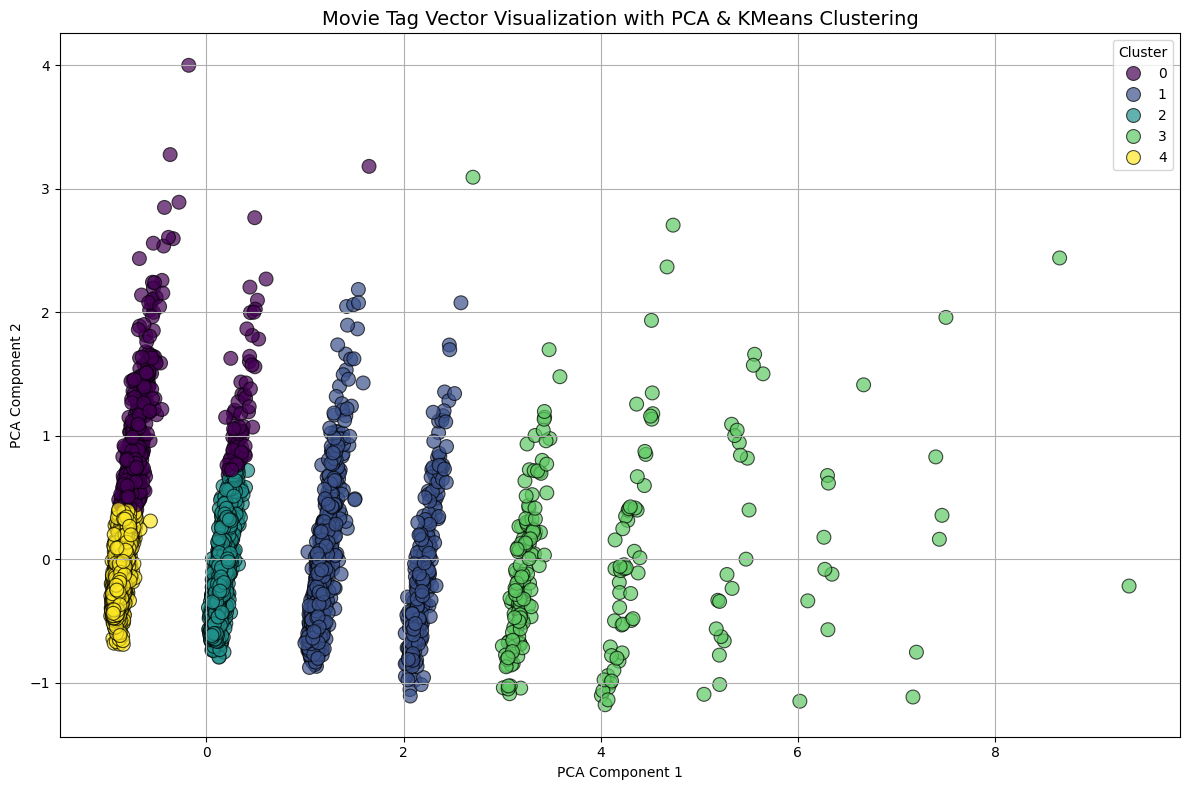

In [71]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

# Reduce vector dimensions
pca = PCA(n_components=2)
reduced_vectors = pca.fit_transform(vectors)

# Optional: Cluster similar movies (e.g. into 5 groups)
kmeans = KMeans(n_clusters=5, random_state=42)
labels = kmeans.fit_predict(reduced_vectors)

# Plot
plt.figure(figsize=(12, 8))
sns.scatterplot(
    x=reduced_vectors[:, 0],
    y=reduced_vectors[:, 1],
    hue=labels,
    palette='viridis',
    s=100,
    alpha=0.7,
    edgecolor='k'
)
plt.title('Movie Tag Vector Visualization with PCA & KMeans Clustering', fontsize=14)
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend(title='Cluster')
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
import plotly.express as px
import pandas as pd

# Create a DataFrame for plotting
plot_df = pd.DataFrame(reduced_vectors, columns=['x', 'y'])
plot_df['title'] = df_new['title']
plot_df['cluster'] = labels

fig = px.scatter(
    plot_df,
    x='x',
    y='y',
    color='cluster',
    hover_data=['title'],
    title='Interactive PCA Visualization of Movie Vectors'
)
fig.show()


ModuleNotFoundError: No module named 'plotly'

In [ ]:
!pip install plotly 